In [1]:
import pandas as pd
import warnings

In [2]:
warnings.filterwarnings('ignore',category=FutureWarning)

In [3]:
df = pd.read_csv(r"C:\Users\isaac\Downloads\tested.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [5]:
df['Age'].fillna(method='ffill',inplace=True)

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [7]:
df['Fare'].fillna(df['Fare'].mean(),inplace=True)

In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [9]:
from sklearn.preprocessing import LabelEncoder

In [11]:
le = LabelEncoder()

df['Sex'] = le.fit_transform(df['Sex'])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",1,28.0,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",1,38.5,0,0,359309,8.0500,NaN,S


In [12]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [13]:
x = df[['Pclass','Sex','Age','Fare']]
y = df['Survived']

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [17]:
models_params = {
    'logistic':{
        'model' : LogisticRegression(),
        'params' :{
            'C' : [5,10,20],
            'max_iter': [1000]
        }
    },
    'gaussian' : {
        'model' : GaussianNB(),
        'params' :{}
    },
    'multinomial' : {
        'model' : MultinomialNB(),
        'params' : {}
    },
    'decisiontree' : {
        'model' : DecisionTreeClassifier(),
        'params' : {
            'criterion' : ['gini','entropy']
        }
    },
    'SVM' : {
        'model' : SVC(),
        'params' : {
            'C' : [5,10,20],
            'kernel' : ['linear','poly','rbf','sigmoid']
        }
    },
    'randomforest' : {
        'model' : RandomForestClassifier(),
        'params' : {
            'n_estimators' : [10,20,30]
        }
    },
    'knn' : {
        'model' : KNeighborsClassifier(),
        'params' : {
            'n_neighbors' : [5,10,20]
        }
    }
}

In [18]:
scores = []

for model_name,mp in models_params.items():
    grid = GridSearchCV(mp['model'],mp['params'],cv=5,return_train_score=False)
    grid.fit(x_train,y_train)
    scores.append({
        'model':model_name,
        'score':grid.best_score_,
        'parameter':grid.best_params_
    })

In [19]:
new_df = pd.DataFrame(scores,columns=['model','score','parameter'])

In [20]:
new_df

,model,score,parameter
0,logistic,1.000000,"{'C': 5, 'max_iter': 1000}"
1,gaussian,1.000000,{}
2,multinomial,0.706694,{}
3,decisiontree,1.000000,{'criterion': 'gini'}
4,SVM,1.000000,"{'C': 5, 'kernel': 'linear'}"
5,randomforest,1.000000,{'n_estimators': 10}
6,knn,0.673768,{'n_neighbors': 5}


In [21]:
model = LogisticRegression(C=5,max_iter=1000)

model.fit(x_train,y_train)

LogisticRegression(C=5, max_iter=1000)

In [22]:
y_pred=model.predict(x_test)

In [23]:
from sklearn.metrics import confusion_matrix

In [24]:
cm = confusion_matrix(y_test,y_pred)

Text(95.72222222222221, 0.5, 'Truth')

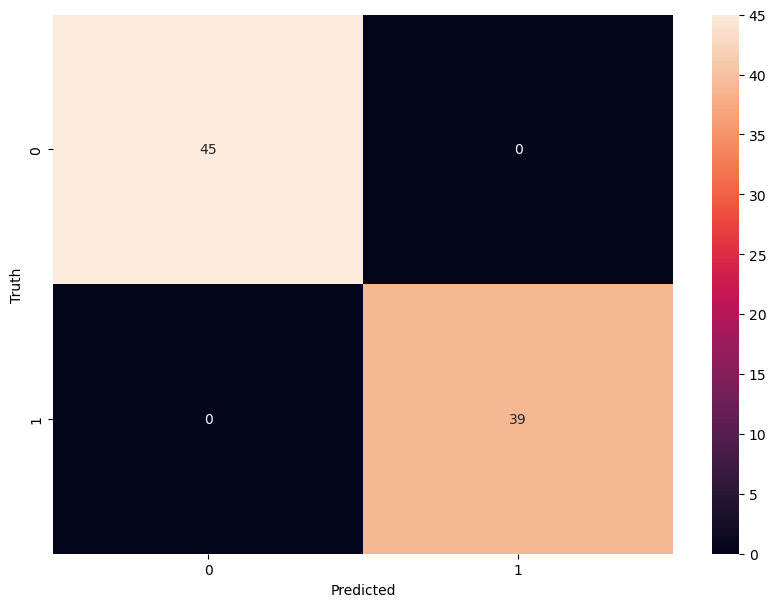

In [25]:
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')